In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df = pd.read_csv("MICRODADOS_ENEM_2022.csv", sep=";", encoding="ISO-8859-1", usecols=columns)

In [40]:
%pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
df.dropna(inplace=True, subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'])
df.head()
df.shape
df = df.sample(n=100000)
df.shape
x = df['NU_NOTA_REDACAO']
y = df['NU_NOTA_LC']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.values.tolist()
y_train = y_train.values.tolist()
print(len(y_train))
print(len(y_test))

80000
20000


In [43]:
def get_b1(X, Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    b1_num = 0
    b1_den = 0
    for xi, yi in zip(X, Y):
        x_diff = xi - x_mean
        y_diff = yi - y_mean
        b1_num += x_diff * y_diff
        b1_den += x_diff ** 2
    return b1_num / b1_den

b1 = get_b1(x_train, y_train)
print(b1)


# def get_b1(x, y):
#    x_mean = sum(x)/len(x)
#    y_mean = sum(y)/len(y)
#    b1 = 0
#    for xi, yi in zip(x, y):
#        eq1 = (xi - x_mean) * (yi - y_mean)
#        eq2 = (xi - x_mean) ** 2
#        b1 += eq1/eq2
#    return b1
# b1 = get_b1(x_train, y_train)
# b1


0.18617056196000908


In [44]:
def get_b0(x, y):
    x_mean = sum(x)/len(x)
    y_mean = sum(y)/len(y)
    return y_mean - (b1 * x_mean)

b0 = get_b0(x_train, y_train)
b0

402.78603238946687

In [45]:
vetor_y = []
for xi in x_train:
    eq = (xi*b1) + b0
    vetor_y.append(eq)

In [46]:
y_mean = sum(y_test)/len(y_test)
eq_sum = sum((yi - y_mean) ** 2 for yi in vetor_y)
rmse = math.sqrt(eq_sum / len(vetor_y))

print("RMSE:", rmse)

RMSE: 38.19407155155679


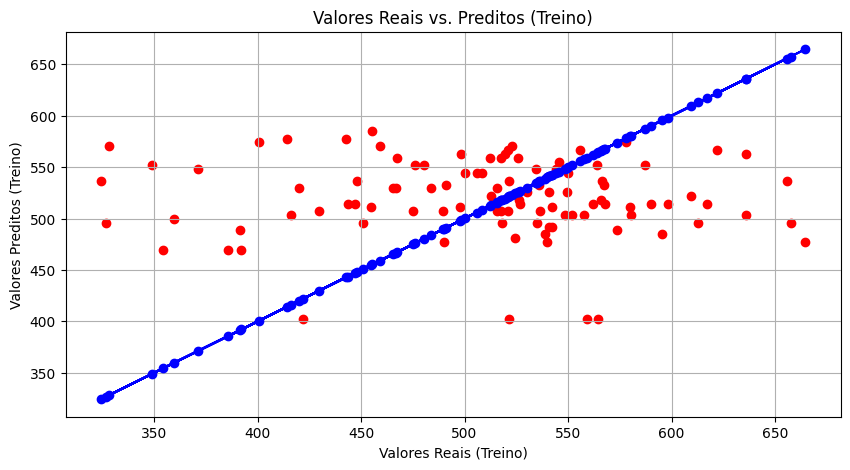

In [47]:
vetor_y = [(b1 * xi) + b0 for xi in x]

plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], y_test[:100], label='Line Plot', color='blue', marker='o')
plt.scatter(y_test[:100], vetor_y[:100], label='Scatter Plot', color='red')
plt.xlabel('Valores Reais (Treino)')
plt.ylabel('Valores Preditos (Treino)')
plt.title('Valores Reais vs. Preditos (Treino)')
plt.grid(True)